In [8]:
#引入房地產資料庫
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict
boston = datasets.load_boston()
print(boston.DESCR)
print(boston.data)
print(boston.target)


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

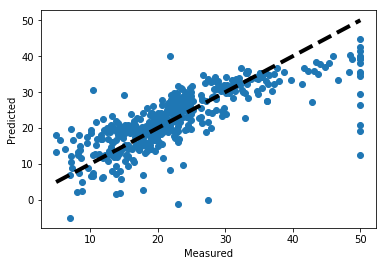

In [16]:
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
boston = datasets.load_boston()
#print(boston.DESCR)
#print(boston.data)
#print(boston.target)
lr=linear_model.LinearRegression()
predicted = cross_val_predict(lr, boston.data, boston.target, cv=10)
#分成十份來訓練，其中一份為測試集
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

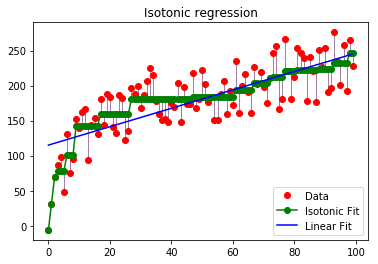

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state
n = 100
x = np.arange(n)
rs = check_random_state(0)
y = rs.randint(-50, 50, size=(n,)) + 50. * np.log(1 + np.arange(n))
ir = IsotonicRegression()
y_ = ir.fit_transform(x, y)
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)
segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(0.5 * np.ones(n))

fig = plt.figure()
plt.plot(x, y, 'r.', markersize=12)
plt.plot(x, y_, 'g.-', markersize=12)
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Isotonic regression')
plt.show()